In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("E:\data.xlsx")

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 15-16: invalid continuation byte

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
new_columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'rest_ecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df.columns = new_columns
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
print("Shape of dataset:", df.shape)

Shape of dataset: (302, 14)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   rest_ecg  302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Preparation of Exploratory data analysis

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Data"])

,Total Missing Data
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

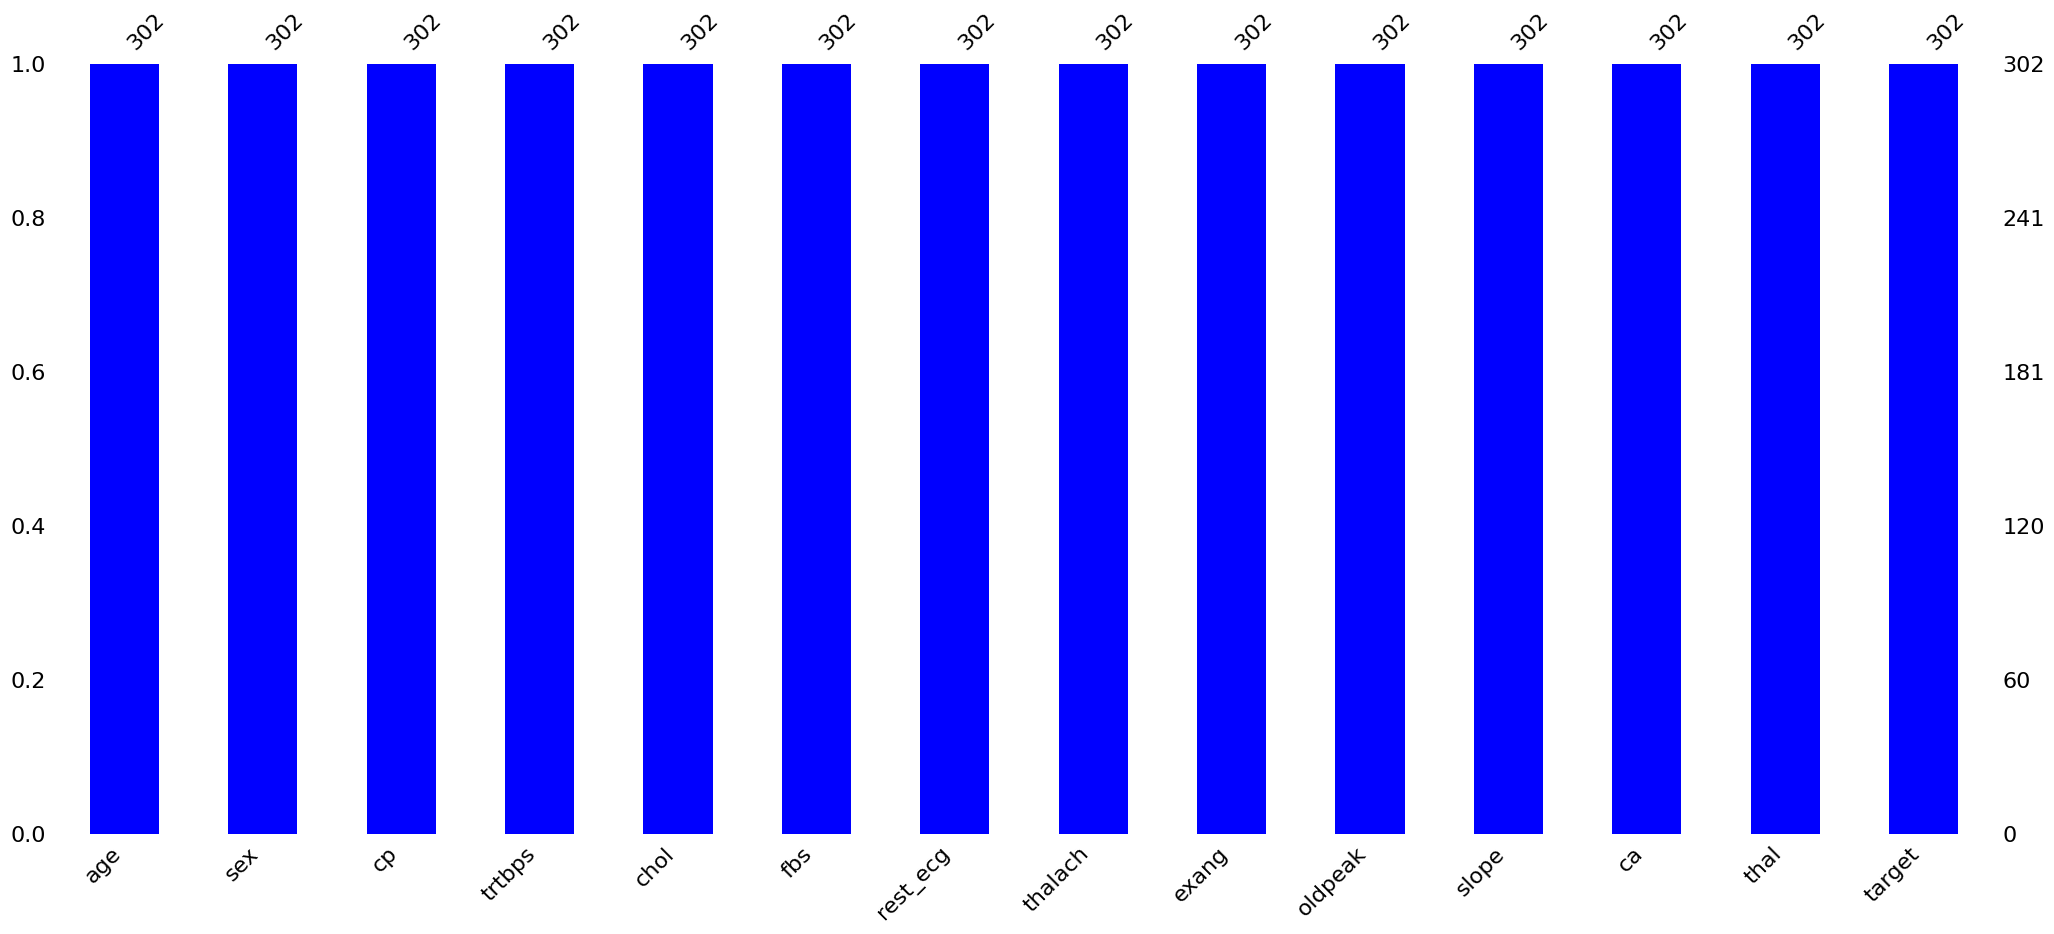

In [11]:
import missingno
missingno.bar(df, color = "b")

EXAMING UNIQUE VALUES


In [12]:
unique_value = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_value.append(x)

pd.DataFrame(unique_value, index = df.columns, columns = ["Total Unique Data"])

,Total Unique Data
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


In [13]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

**Examining Staticstics o**f **Variables**

In [14]:
df[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


<Axes: xlabel='age', ylabel='Density'>

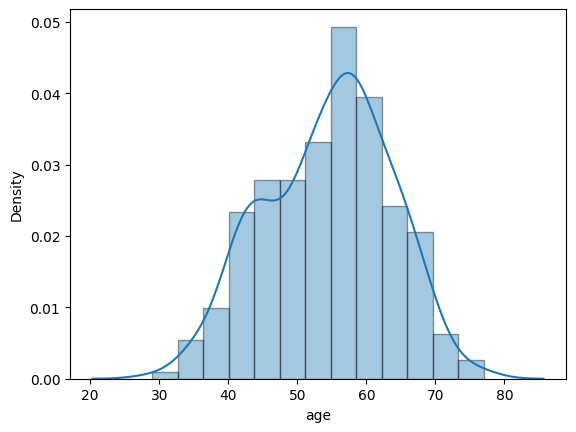

In [17]:
sns.distplot(df["age"], hist_kws = dict(linewidth = 1, edgecolor = "k") )

<Axes: xlabel='trtbps', ylabel='Density'>

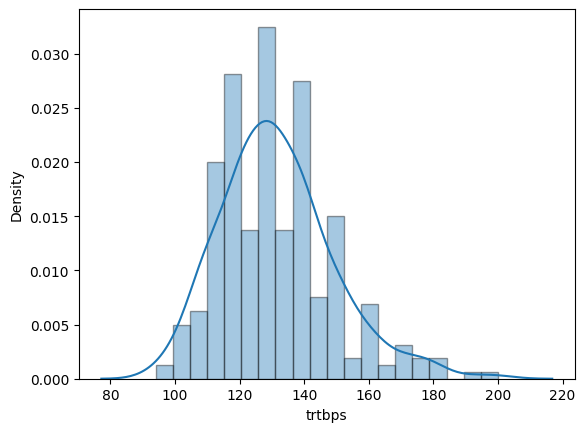

In [18]:
sns.distplot(df["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)

20

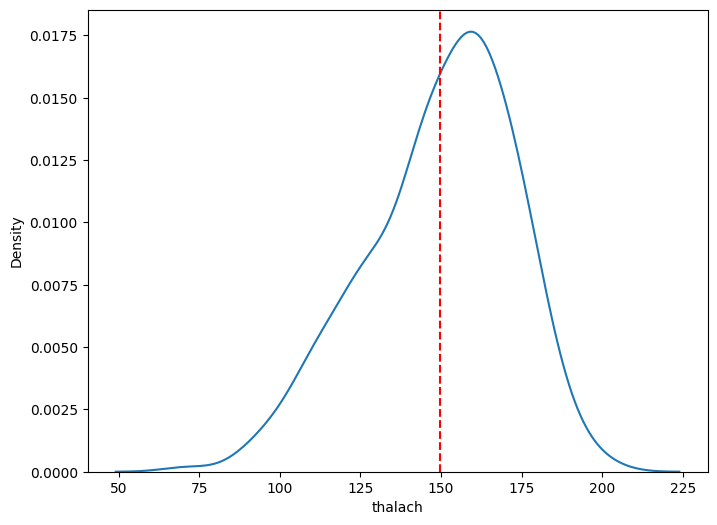

In [19]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["thalach"], hist = False, ax = y )
y.axvline(df["thalach"].mean(), color = "r", ls = "--");20

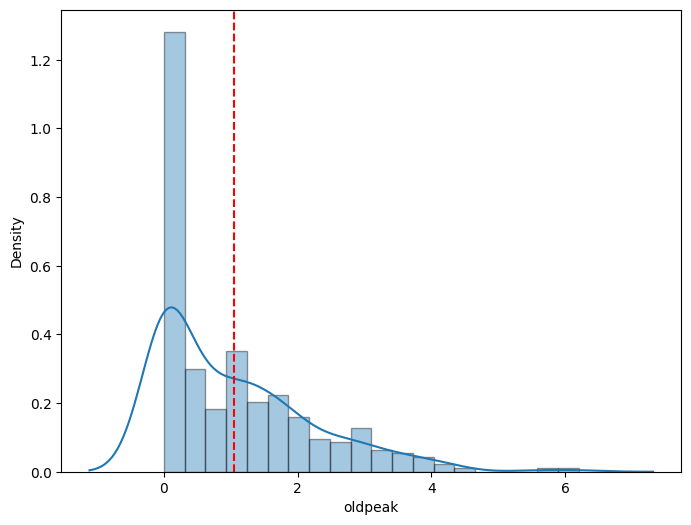

In [20]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["oldpeak"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20, ax = y )
y.axvline(df["oldpeak"].mean(), color = "r", ls = "--");

**Uni-variate** **Analysis**

In [21]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [22]:
numeric_axis_name = ["Age of Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]

In [23]:
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

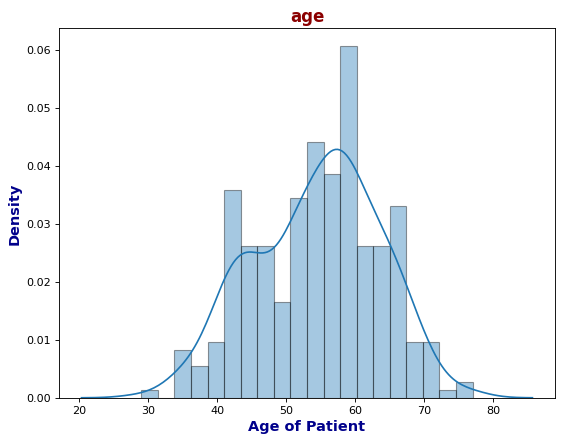

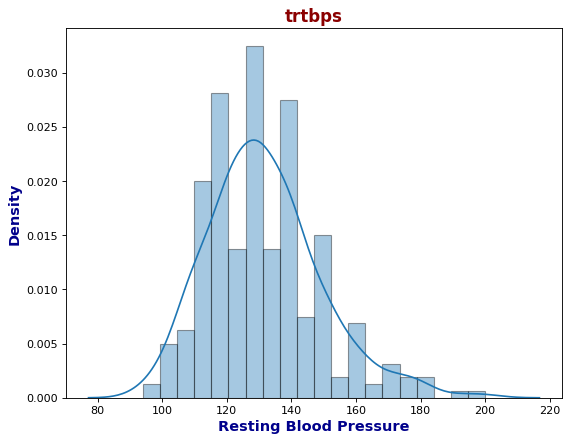

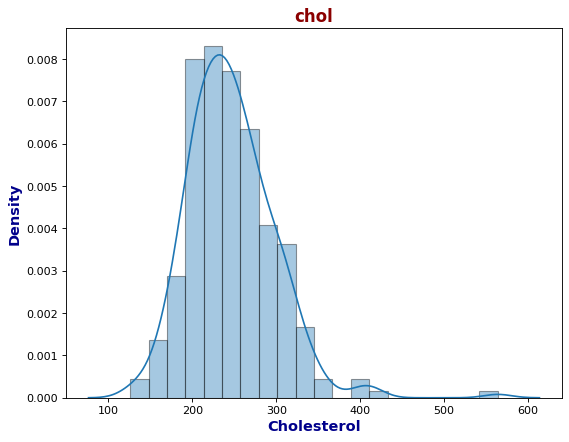

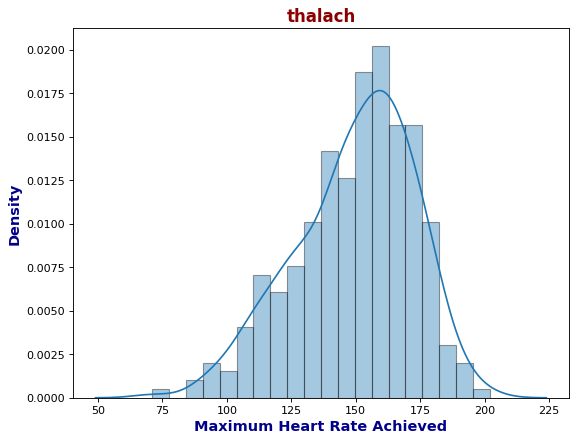

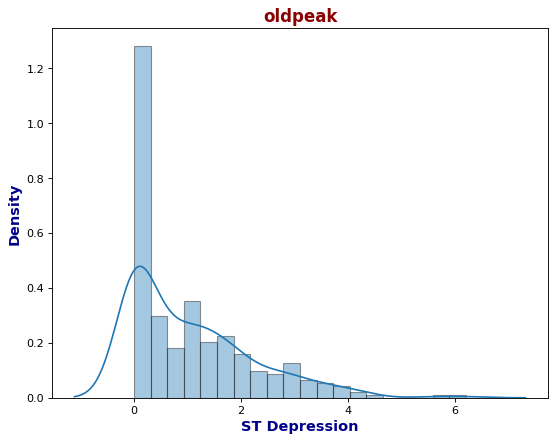

In [24]:
title_font = {"family": "arial",
             "color": "darkred",
             "weight": "bold",
             "size": 15}
axis_font = {"family": "arial",
             "color": "darkblue",
             "weight": "bold",
             "size": 13}

for i, j in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize =(8, 6), dpi =80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    plt.title(i, fontdict = title_font)
    plt.xlabel(j, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    plt.tight_layout
    plt.show()

In [25]:
categoric_axis_name = ["Gender",
                       "Chest Pain Type",
                       "Fasting Blood sugar",
                       "Resting Electrocardiographic Results",
                       "Exercise Induced Angina",
                       "The Slope of ST Segment",
                       "Number of Major Vessels",
                       "Thal",
                       "Target"]

In [26]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

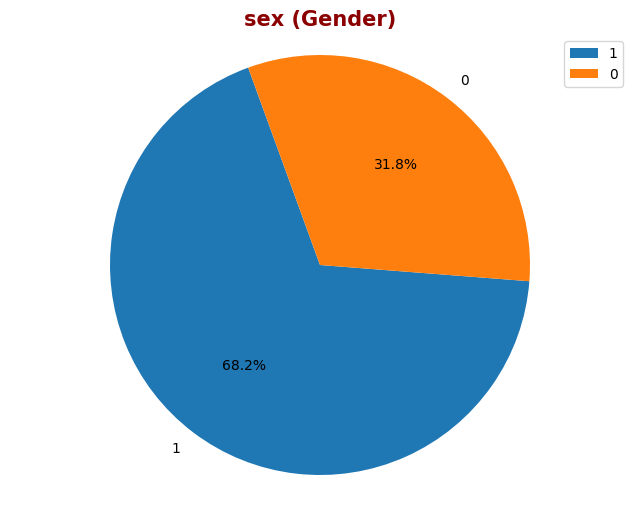

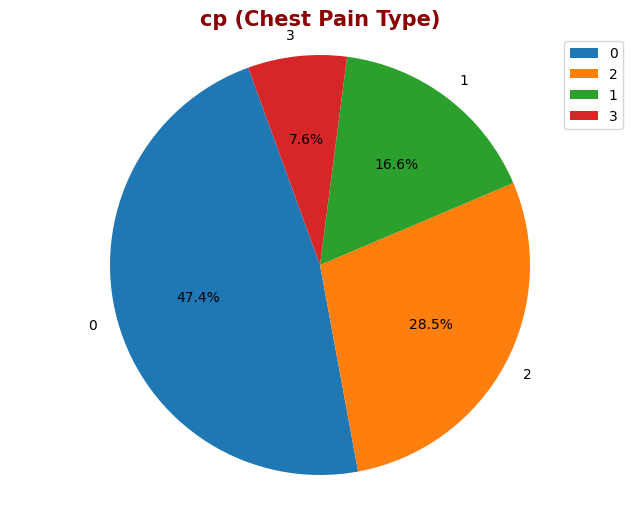

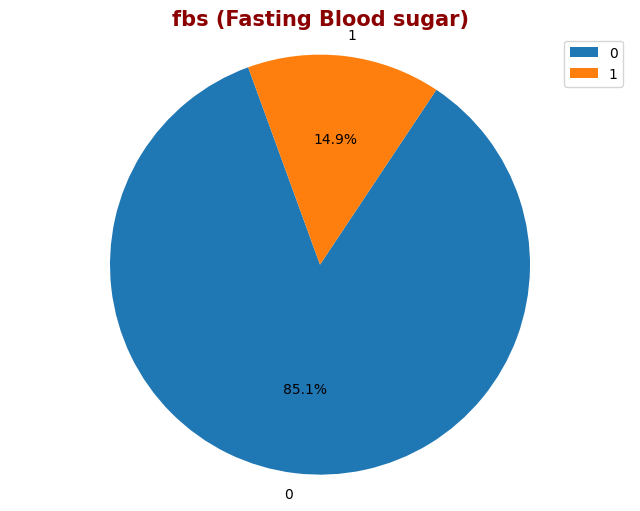

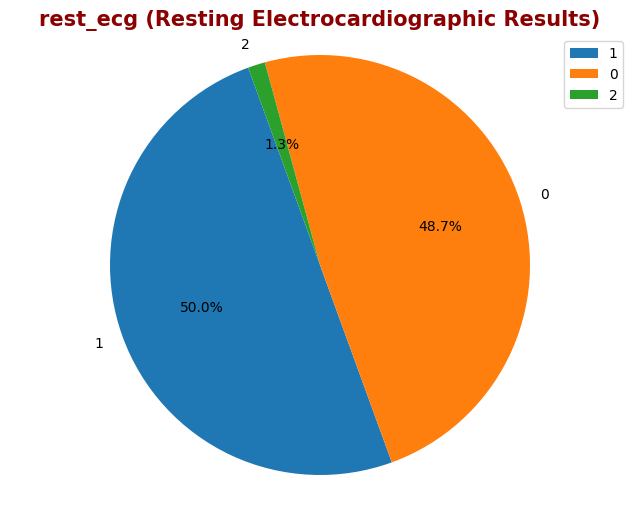

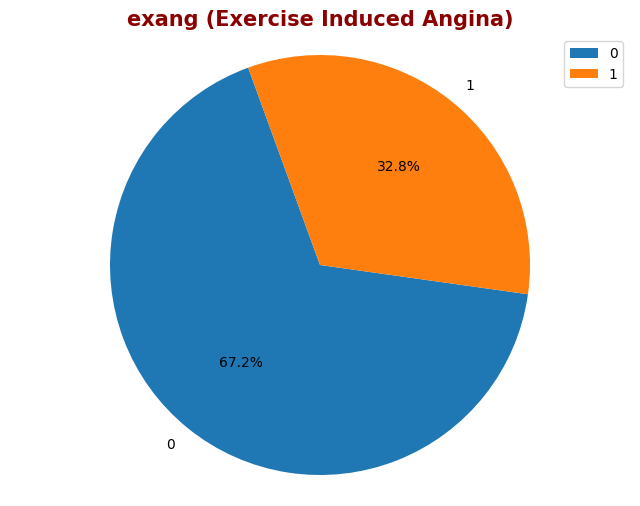

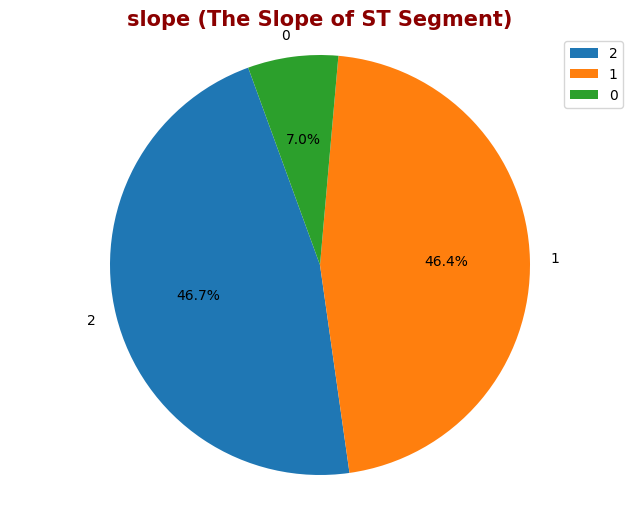

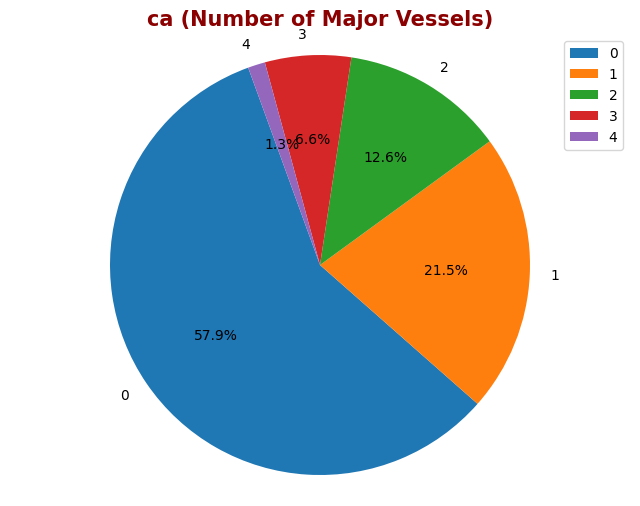

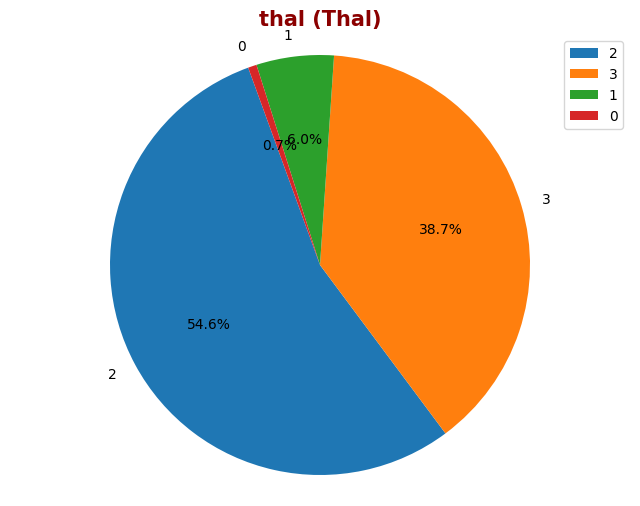

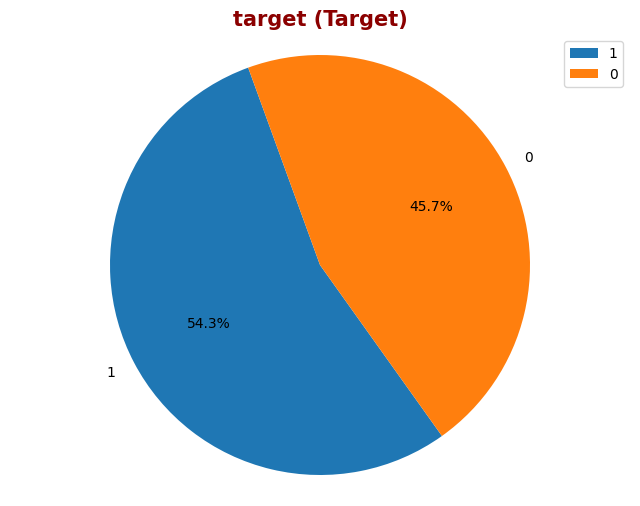

In [27]:
title_font = {"family": "arial",
             "color": "darkred",
             "weight": "bold",
             "size": 15}
axis_font = {"family": "arial",
             "color": "darkblue",
             "weight": "bold",
             "size": 13}

for i, j in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))

    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())

    ax.pie(total_observation_values, labels = observation_values, autopct = '%1.1f%%', startangle = 110,labeldistance = 1.1)
    ax.axis("equal")

    plt.title((i + " " + "(" + j + ")"), fontdict = title_font)
    plt.legend()
    plt.show()

Categorical-Target Variables Analysis with Count **Plot**

In [28]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

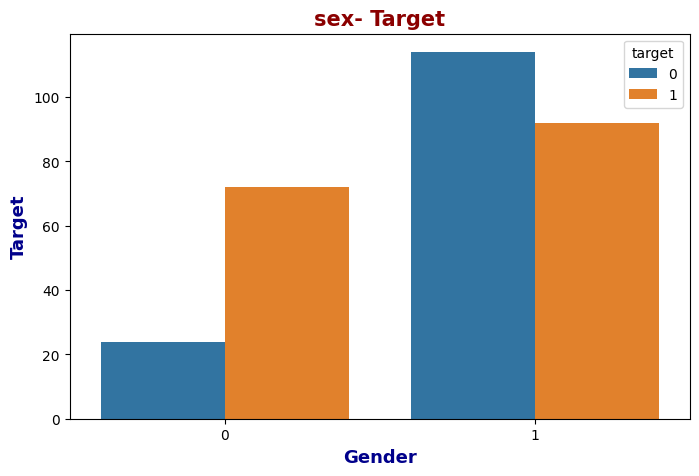

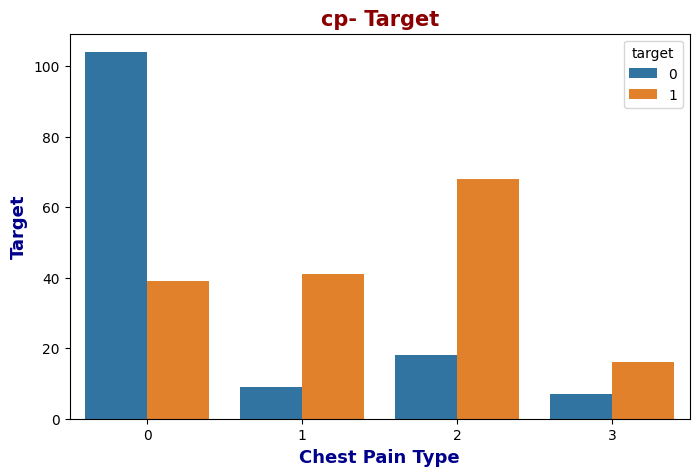

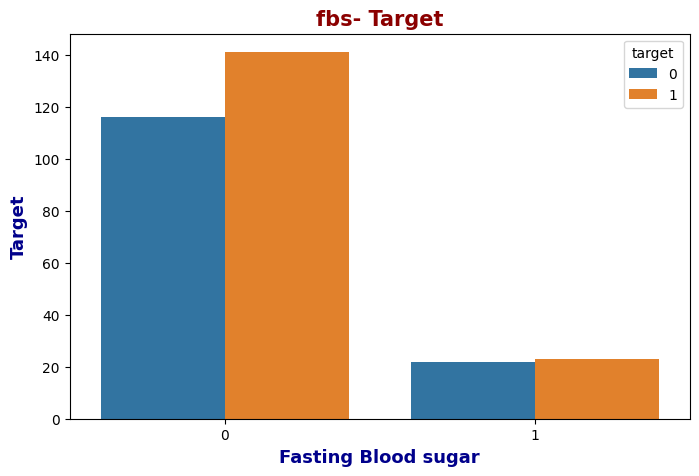

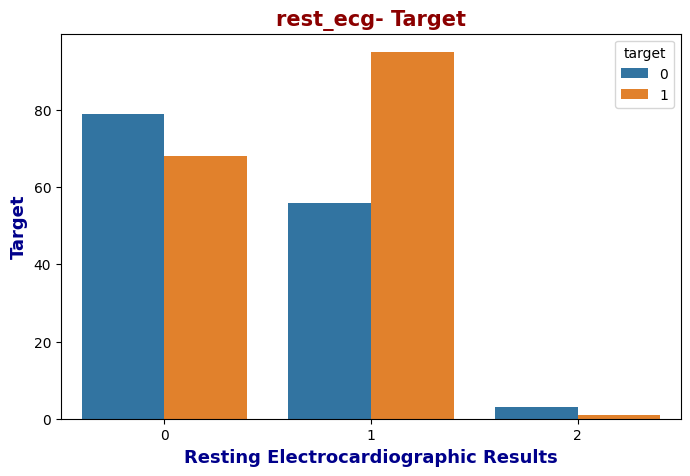

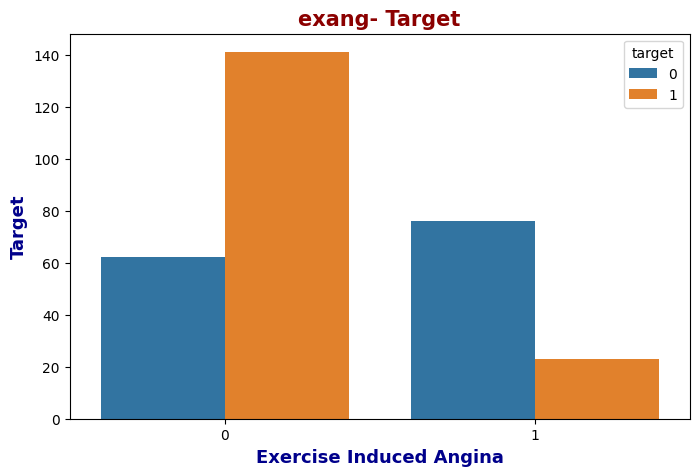

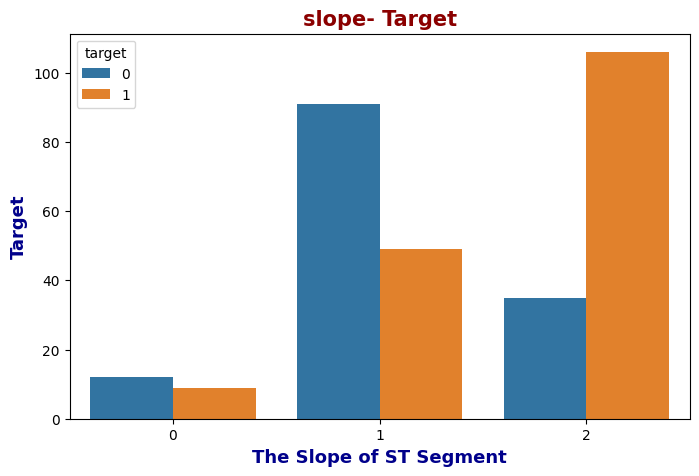

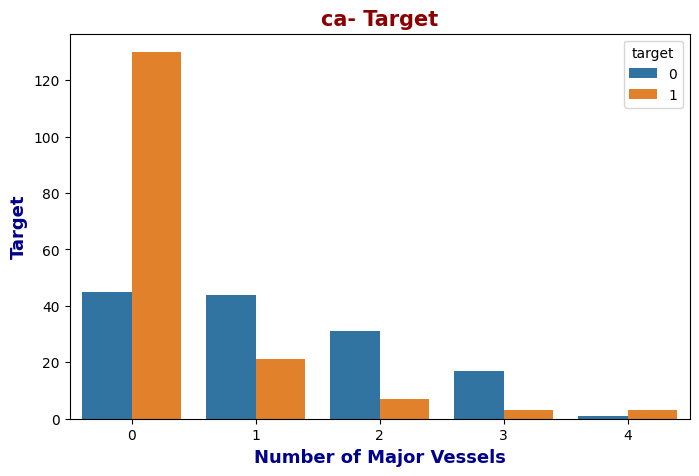

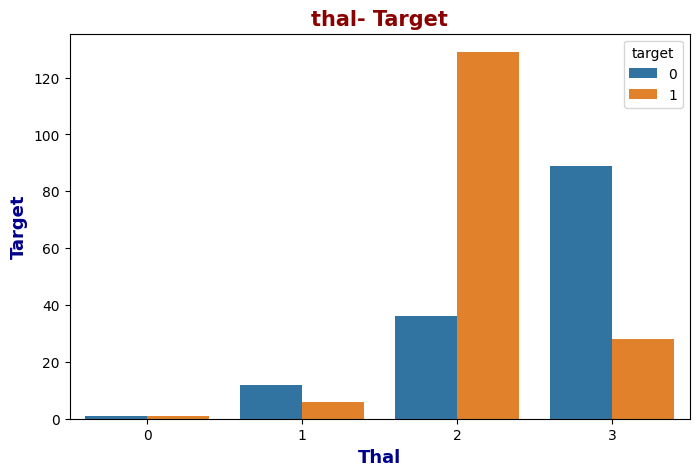

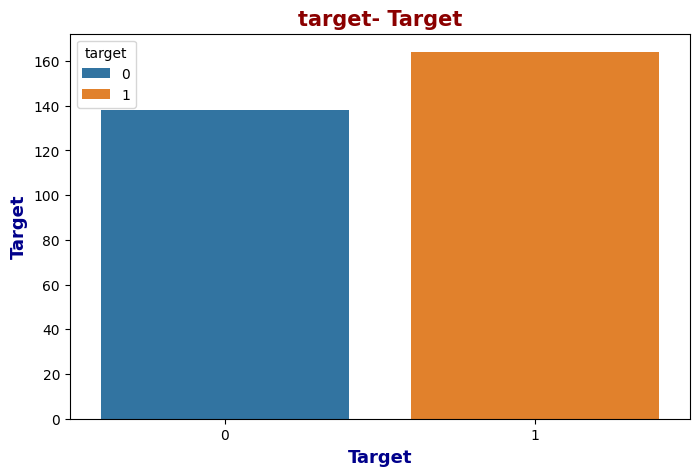

In [29]:
# target:
# 0 = less chance of heart attack
# 1 = more chance of heart attack
title_font = {"family": "arial",
             "color": "darkred",
             "weight": "bold",
             "size": 15}
axis_font = {"family": "arial",
             "color": "darkblue",
             "weight": "bold",
             "size": 13}

for i, j in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize = (8, 5))
    sns.countplot(x = i, data =df[categoric_var], hue = "target")

    plt.title(i + "- Target", fontdict = title_font)
    plt.xlabel(j, fontdict = axis_font)
    plt.ylabel("Target", fontdict = axis_font)

    plt.tight_layout
    plt.show()

In [35]:
df_copy = df.copy()

In [36]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [38]:
categoric_var.remove("fbs")
categoric_var.remove("rest_ecg")

In [39]:
categoric_var

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [40]:
df_copy = pd.get_dummies(df_copy, columns = categoric_var[:-1], drop_first = True)

In [41]:
new_columns = df_copy.columns.difference(df.columns)

In [43]:
df_copy[new_columns] = df_copy[new_columns].astype(int)

In [44]:
df_copy.head()

,age,trtbps,chol,fbs,rest_ecg,thalach,oldpeak,target,sex_1,cp_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,1,0,150,2.3,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,0,1,187,3.5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,0,0,172,1.4,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,0,1,178,0.8,1,1,1,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,0,1,163,0.6,1,0,0,...,1,0,1,0,0,0,0,0,1,0


In [45]:
new_numeric_var = ["age", "thalach", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df_copy.drop(["target"], axis = 1)
y = df_copy[["target"]]
X
y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)
X_train.head()
y_train.head()

,target
201,0
82,1
187,0
259,0
5,1


In [50]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


 Modeling
 Logistic Regression Algorithm

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [52]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1])

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print("Tesdt accuracy: {}".format(accuracy))

Tesdt accuracy: 0.9032258064516129


Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8


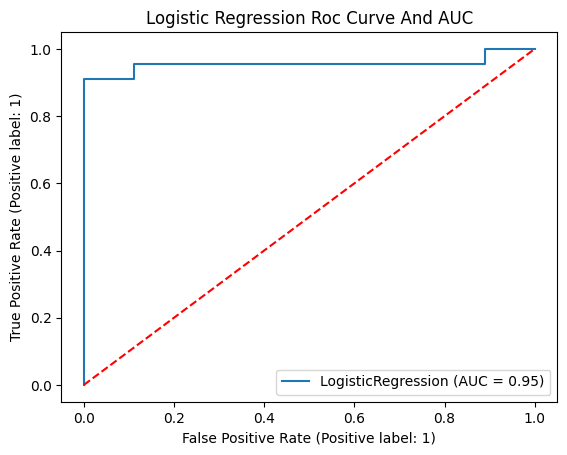

In [57]:
from sklearn.metrics import RocCurveDisplay
log_disp = RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

Decision Tree Algorithm

In [1]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state = 5)
dec_tree.fit(X_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NameError: name 'X_train' is not defined

In [59]:
y_pred = dec_tree.predict(X_test)
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is: 0.6774193548387096


In [60]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.5833333333333333


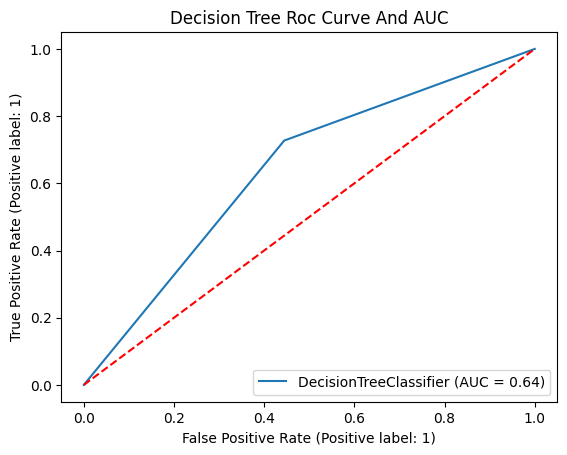

In [62]:
dec_disp = RocCurveDisplay.from_estimator(dec_tree, X_test, y_test)
plt.title("Decision Tree Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

Support Vector Machine Algorithm

In [63]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 5)
svc_model.fit(X_train, y_train)

SVC(random_state=5)

In [64]:
y_pred = svc_model.predict(X_test)
print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is: 0.6451612903225806


In [65]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7083333333333334


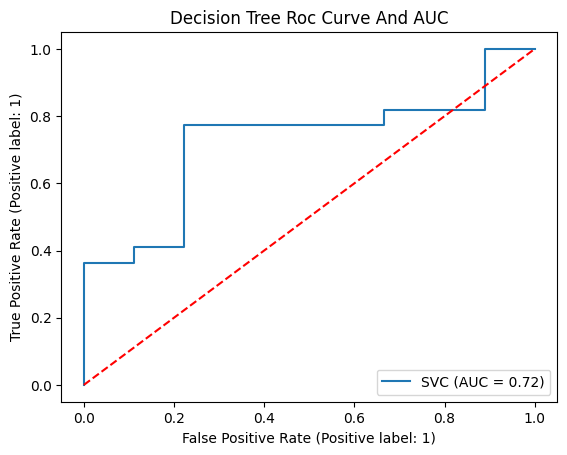

In [66]:
svm_disp = RocCurveDisplay.from_estimator(svc_model, X_test, y_test)
plt.title("Decision Tree Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

RANDOM FOREST

In [67]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 5)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [68]:
y_pred = random_forest.predict(X_test)
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is 0.9032258064516129


Cross-Validation Accuracy Scores 0.7666666666666666


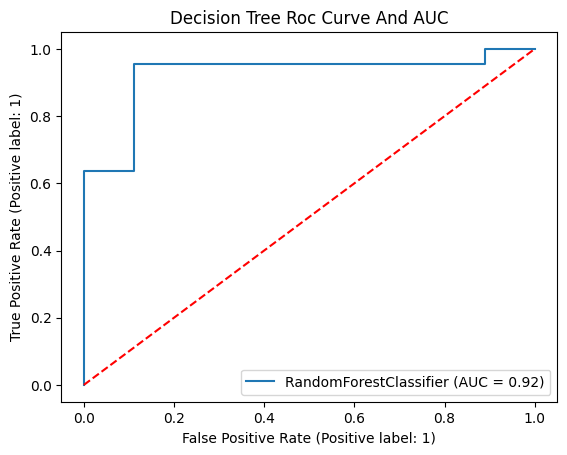

In [69]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

random_forest_disp = RocCurveDisplay.from_estimator(random_forest, X_test, y_test)
plt.title("Decision Tree Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()